In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


%pip uninstall shapely
%pip install shapely --no-binary shapely # HAY QUE RESPONDER Y (YES)
%pip install --upgrade cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/shapely-2.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/shapely.libs/libgeos-ee7a1634.so.3.11.1
    /usr/local/lib/python3.10/dist-packages/shapely.libs/libgeos_c-5ef8a841.so.1.17.1
    /usr/local/lib/python3.10/dist-packages/shapely/*
Proceed (Y/n)? Y
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890038 sha256=58e6895f96eebc32da5a41871441e36f79fd8b71f20bd36ae3eb223a62b089b4
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely
   

Comenzamos la practica 5!
No se olviden de cargar los datos en drive y a plotear!

EJERCICIO 2
Abrimos y ploteamos los datos de SST fase positiva

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


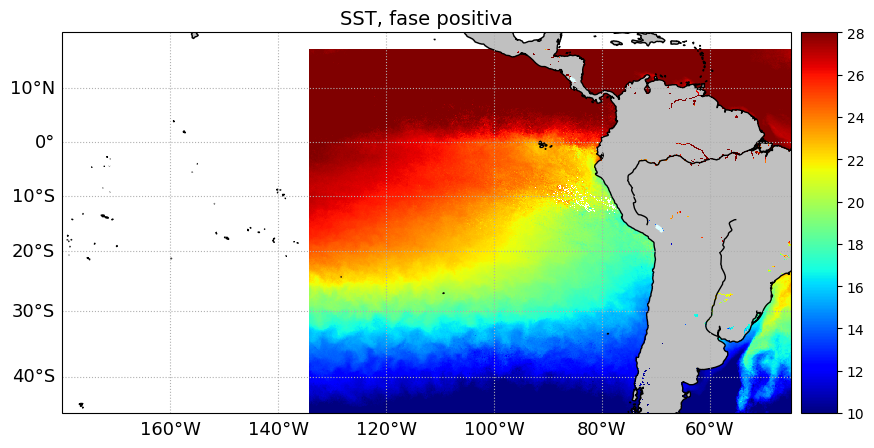

In [ ]:
# Cargo SST para fase positiva
sst1 = xr.open_dataset('/content/g4.timeAvgMap.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.20150801-20151031.134W_45S_33W_17N.nc',decode_times=False)
#sst1 = xr.open_dataset('/Users/laura/OneDrive - cima.fcen.uba.ar/Oceanografia_satelital/2023/TP5/g4.timeAvgMap.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.20150801-20151031.134W_45S_33W_17N.nc')

# miro metadata
sst1

# chequeo unidades
sst1.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.units

# cargo variables
lon = sst1.lon.data
lat = sst1.lat.data
sst_pos = sst1.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.data

# grafico
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SST, fase positiva',color='black', size=14)
cm = plt.pcolormesh(lon,lat,sst_pos,vmin = np.nanmin(sst_pos),vmax = np.nanmax(sst_pos),cmap = 'jet',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)

# elegir el rango de valores de sst que destaque mejor lo que queremos ver
cm.set_clim(10,28)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-50,-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()

Ahora abrimos y ploteamos los datos de SST de la fase negativa

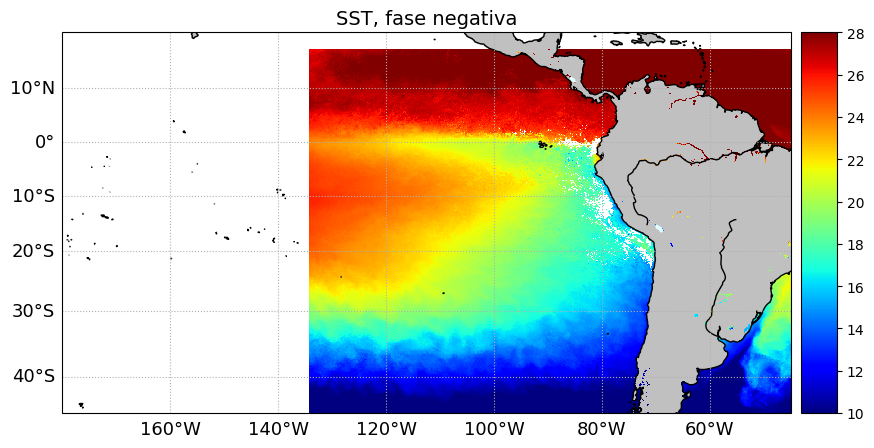

In [ ]:
# Cargo SST para fase negativa
sst2 = xr.open_dataset('/content/g4.timeAvgMap.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.20220801-20221031.134W_45S_33W_17N.nc',decode_times=False)
#sst2 = xr.open_dataset('/Users/laura/OneDrive - cima.fcen.uba.ar/Oceanografia_satelital/2023/TP5/g4.timeAvgMap.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.20220801-20221031.134W_45S_33W_17N.nc')

# miro metadata
sst2

# chequeo unidades
sst2.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.units

# cargo variables
#lon = sst2.lon.data
#lat = sst2.lat.data
sst_neg = sst2.MODISA_L3m_NSST_Monthly_9km_R2019_0_sst.data

# grafico
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SST, fase negativa',color='black', size=14)

cm = plt.pcolormesh(lon,lat,sst_neg,vmin = np.nanmin(sst_neg),vmax = np.nanmax(sst_neg),cmap = 'jet',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)

# elegir el rango de valores de sst que destaque mejor lo que queremos ver
cm.set_clim(10,28)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-50,-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()



Analizamos las diferencias de temperatura entre los eventos. Se puede hacer la diferencia total (Niño - Niña) o la diferencia (Niña - neutro) y (Niño - neutro)

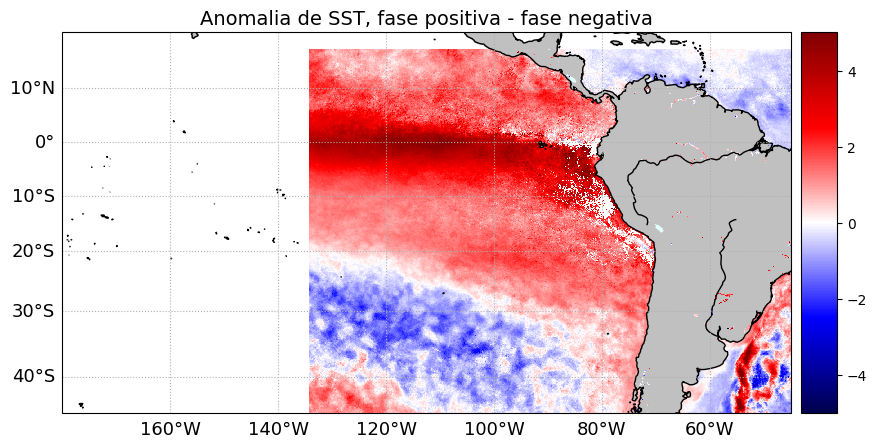

In [ ]:
# Hago la diferencia entre fase positiva y negativa
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('Anomalia de SST, fase positiva - fase negativa',color='black', size=14)
cm = plt.pcolormesh(lon,lat,sst_pos-sst_neg,vmin = np.nanmin(sst_pos-sst_neg),vmax = np.nanmax(sst_pos-sst_neg),cmap = 'seismic',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)

# elegir el rango de valores de sst que destaque mejor lo que queremos ver
cm.set_clim(-5,5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-50,-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()


EJERCICIO 4

Abrimos y ploteamos los datos de anomalia del nivel del mar (SLA)

<ipython-input-6-a593da394946>:24: RuntimeWarning: Mean of empty slice
  cm = plt.pcolormesh(lon,lat,np.nanmean(sla_pos,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())


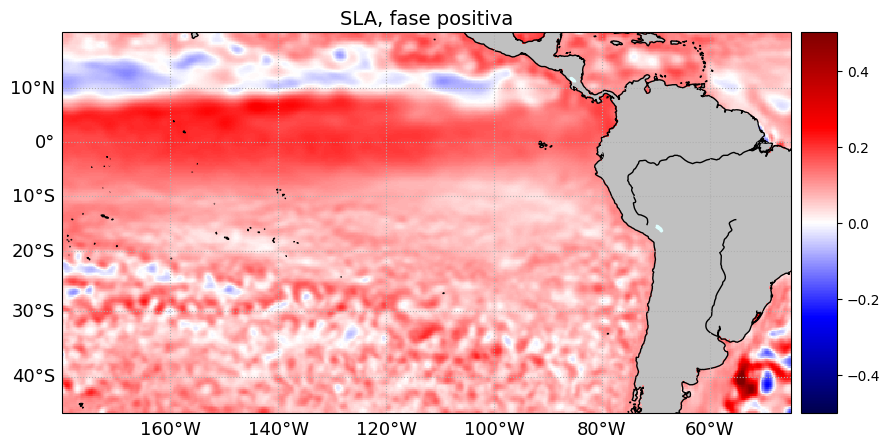

In [ ]:
# cargo SLA fase positiva
alt = xr.open_dataset('/content/SLA_fase_positiva_ENSO.nc',decode_times=False)
#alt = xr.open_dataset('/Users/Laura/OneDrive - cima.fcen.uba.ar/Oceanografia_satelital/2023/TP5/SLA_fase_positiva_ENSO.nc')

# Vemos la metadata del xarray
alt

lon = alt.longitude.data-360
lat = alt.latitude.data
sla_pos = alt.sla.data
time = alt.time.data

# Grafico
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SLA, fase positiva',color='black', size=14)
cm = plt.pcolormesh(lon,lat,np.nanmean(sla_pos,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)
cm.set_clim(-.5,.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()


<ipython-input-8-b430e2acb5f6>:24: RuntimeWarning: Mean of empty slice
  cm = plt.pcolormesh(lon,lat,np.nanmean(sla_neg,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())


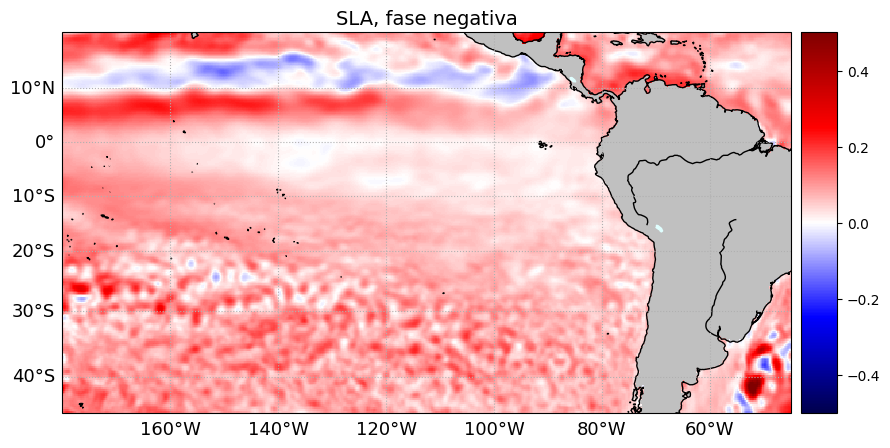

In [ ]:
# cargo SLA fase negativa
alt = xr.open_dataset('/content/SLA_fase_negativa_ENSO.nc')
#alt = xr.open_dataset('/Users/Laura/OneDrive - cima.fcen.uba.ar/Oceanografia_satelital/2023/TP5/SLA_fase_negativa_ENSO.nc')

# Vemos la metadata del xarray
alt

lon = alt.longitude.data-360
lat = alt.latitude.data
sla_neg = alt.sla.data
time = alt.time.data

# Grafico
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SLA, fase negativa',color='black', size=14)
cm = plt.pcolormesh(lon,lat,np.nanmean(sla_neg,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)
cm.set_clim(-.5,.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')

gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()


<ipython-input-9-7c520cb9f74f>:25: RuntimeWarning: Mean of empty slice
  cm = plt.pcolormesh(lon,lat,np.nanmean(sla_n,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())


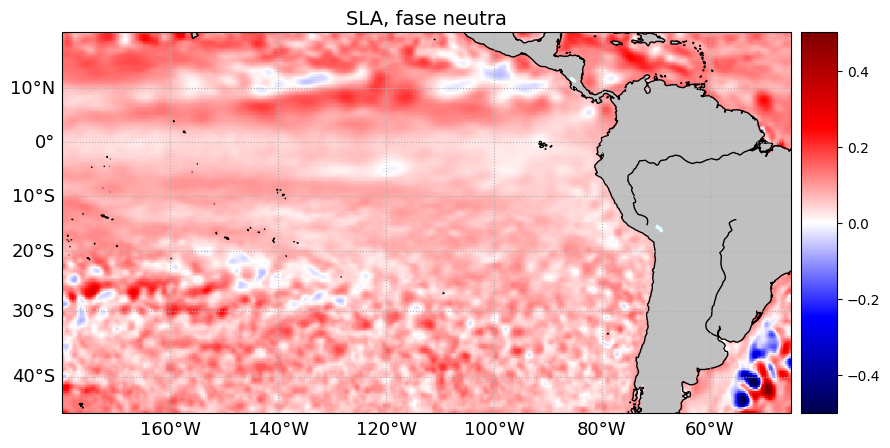

In [ ]:
# cargo SLA fase neutra
alt = xr.open_dataset('/content/SLA_fase_neutra.nc')
#alt = xr.open_dataset('/Users/Laura/OneDrive - cima.fcen.uba.ar/Oceanografia_satelital/2023/TP5/SLA_fase_neutra.nc')

# Vemos la metadata del xarray
alt

lon = alt.longitude.data-360
lat = alt.latitude.data
sla_n = alt.sla.data
time = alt.time.data

# Grafico
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SLA, fase neutra',color='black', size=14)

cm = plt.pcolormesh(lon,lat,np.nanmean(sla_n,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)
cm.set_clim(-.5,.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()


Analizamos las diferencias de SLA entre los eventos. Se puede hacer la diferencia total (Niño - Niña) o la diferencia (Niña - neutro) y (Niño - neutro)

<ipython-input-10-3944824b38ba>:13: RuntimeWarning: Mean of empty slice
  cm = plt.pcolormesh(lon,lat,np.nanmean(sla_neg,axis=0) - np.nanmean(sla_n,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())


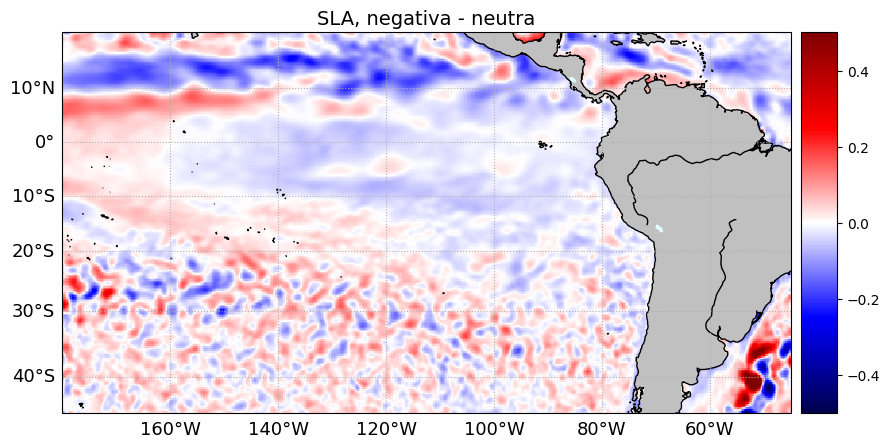

In [ ]:
# Grafico SLA fase negativa - SLA fase neutra
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SLA, negativa - neutra',color='black', size=14)

cm = plt.pcolormesh(lon,lat,np.nanmean(sla_neg,axis=0) - np.nanmean(sla_n,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)
cm.set_clim(-.5,.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Add a title to the plot
plt.show()


<ipython-input-11-0182ff2bf160>:14: RuntimeWarning: Mean of empty slice
  cm = plt.pcolormesh(lon,lat,np.nanmean(sla_pos,axis=0) - np.nanmean(sla_n,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())


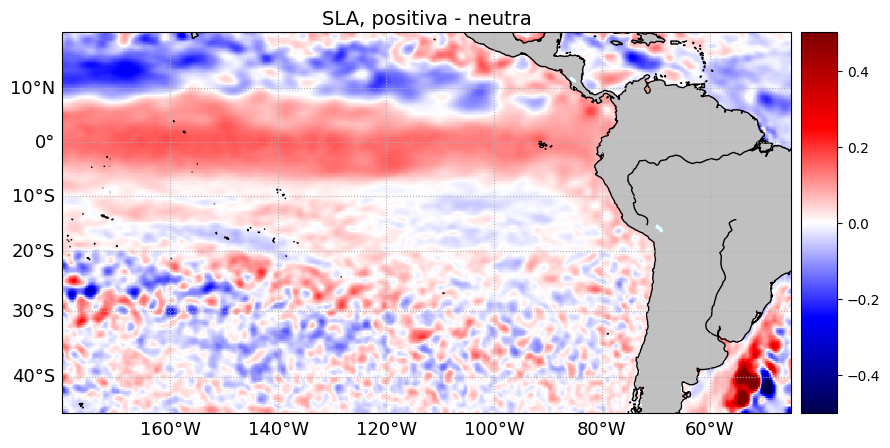

In [ ]:
# Grafico SLA fase positiva - SLA fase neutra
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
#ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-120.0, central_latitude=-30.0))
lon_min = -180; lon_max = -45
lat_min = -45; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('SLA, positiva - neutra',color='black', size=14)

cm = plt.pcolormesh(lon,lat,np.nanmean(sla_pos,axis=0) - np.nanmean(sla_n,axis=0),cmap = 'seismic',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)
cm.set_clim(-.5,.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180,-160,-140,-120,-100,-80,-60,-40])
gl.ylocator = mticker.FixedLocator([-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()



Abrimos y ploteamos los datos de % de humedad de suelo de GRACE

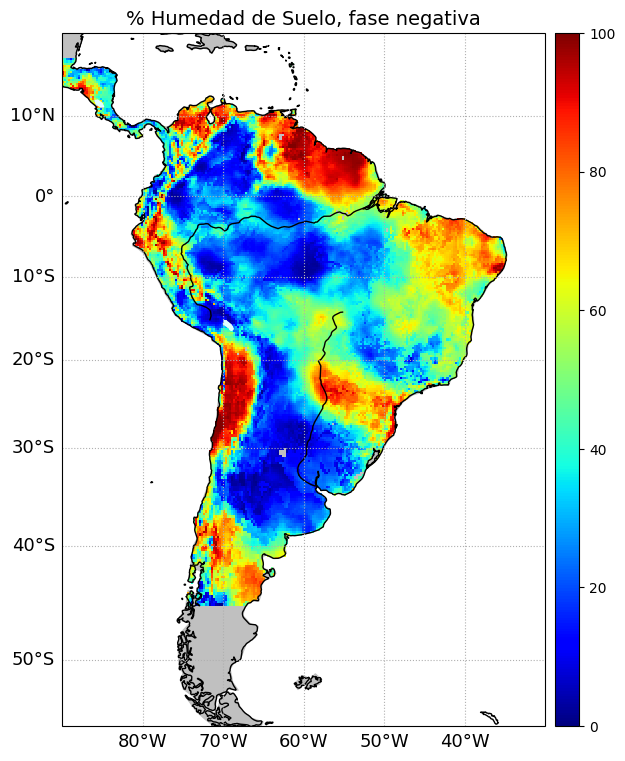

In [ ]:
# Fase negativa
#grace = xr.open_dataset('/Users/Laura/OneDrive - cima.fcen.uba.ar/Oceanografia_satelital/2023/TP5/g4.timeAvgMap.GRACEDADM_CLSM025GL_7D_3_0_sfsm_inst.20221001-20221231.134W_45S_33W_17N.nc')
grace = xr.open_dataset('/content/g4.timeAvgMap.GRACEDADM_CLSM025GL_7D_3_0_sfsm_inst.20221001-20221231.134W_45S_33W_17N.nc')

# Vemos la metadata del xarray
grace

lon = grace.lon.data-360
lat = grace.lat.data
hum_neg = grace.GRACEDADM_CLSM025GL_7D_3_0_sfsm_inst.data


# Grafico
fig = plt.figure(figsize=(8, 9), facecolor='white')
ax = plt.axes(projection=ccrs.Mercator())
#ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-120.0, central_latitude=-30.0))
lon_min = -90; lon_max = -30
lat_min = -55; lat_max = 20
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs = ccrs.PlateCarree()) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)
plt.title('% Humedad de Suelo, fase negativa',color='black', size=14)
cm = plt.pcolormesh(lon,lat,hum_neg,cmap = 'jet',transform = ccrs.PlateCarree())
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(cm,cax=ax_cb)
cm.set_clim(0,100)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
gl.top_labels = False; gl.right_labels = False
#gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-90,-80,-70,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([-60,-50,-40,-30,-20,-10,0,10,20])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
plt.show()

Repetir el grafico de la fase positiva, de fase (positiva - neutra) y fase (negativa - neutra)

A tener en cuenta: Realizamos un analisis sencillo de como impacta el fenómeno climatico ENSO en la temperatura, altura del mar y humedad de suelo. Sin embargo, para analizarlo correctamente deberiamos eliminar la tendencia a largo plazo de todas las variables,
eliminar el ciclo estacional (ya sea restando el año climatológico o filtrando las variabilidades menores a un año). Lo de la tendencia a largo plazo es evidente en la SLA.
Mirar el siguiente video de la variacion de la anomalia del nivel del mar (SLA) y de temperatura
https://svs.gsfc.nasa.gov/30756/
https://svs.gsfc.nasa.gov/30489
https://www.youtube.com/watch?v=48flIFPAL78